# Heart Failure Clinical Records Dataset
### Esteban Caliva s266827
### Table of contents
1. [Introduction](#1.-Introduction)
2. [Dataset Exploration](#2.-Dataset-Exploration)
   1. [Scatter Plots](#2.1-Scatter-Plot-and-Data-Distribution)
   2. [Target Class Distribution](#2.2-Target-Class-Distribution)
   3. [Feature Distribution](#2.3-Feature-Distribution)
3. [Preparing the Dataset](#3.-Preparing-the-Dataset)
   1. [Principal Component Analysis](#3.1-Principal-Component-Analysis-(PCA))
   2. [Test and Training Set](#3.2-Train-and-Test-Sets)
4. [Hear Failure Death Event Prediction](#4.-Hear-Failure-Death-Event-Prediction)
   1. [K-Nearest Neighbors](#4.3-K-Nearest-Neighbors)
   2. [SVM](#4.4-SVM)
   3. [Decision Tree](#4.6-Decision-Tree)
   4. [Random Forest](#4.7-Random-Forest)
   5. [Logistic Regression](#4.8-Logistic-Regression)
5. [Analysis ](#5.-Analysis )
6. [Conclusions](#6.-Conclusions)

In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# 1. Introduction

The dataset used in this work is "Heart Failure Clinical Records". [Dataset link](https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv)

Heart failure occurs when the heart cannot pump sufficiently to maintain the blood flow required to meet the body tissue's metabolic needs.

The dataset contains 12 characteristics and 299 entries, which collect clinical, body, and lifestyle information from the patient. The goal is to identify if these features can predict a "Death Event".

The Faisalabad Institute of Cardiology and the Allied Hospital in Faisalabad (Punjab, Pakistan) collected the data during April–December 2015.

The first task is to understand the features, its meaning, units, and ranges.

|Feature   |Explanation  |Measurement|  Range  |
|:---------|:-----------:|:---------:|--------:|
|Age|Age of the patient|Years|\[40-95\]|
|Anaemia|Decrease of red blood cells or hemoglobin|Boolean|0,1|
|High Blood Preassure|If a patient has hypertension|Boolean|0,1|
|Creatinine phosphokinase|Level of the CPK enzyme in the blood|mcg/L|\[23-7861\]|
|Diabetes|If the patient has diabetes|Boolean|0,1|
|Ejection fraction|Percentage of blood leaving the heart at each contraction|Porcentage|\[14-80\]|
|Sex|Woman or man|Binary|0,1|
|Platelets|Platelets in the blood|kiloplatelets/ml|\[25.21-850.00\]|
|Serum creatinine|Level of creatinine in the blood|mg/dl|\[0.50-9.40\]|
|Serum sodium|Level of sodium in the blood|mEq/L|\[114-148\]|
|Smoking|If the patient smokes|Boolean|0,1|
|Time|Follow-up period|Days|\[4-285\]|

The target class is the **Death Event** which is binary. 

The code is written using Python 3 kernel inside a Jupyter Notebook and uses libraries such as Sklearn for Machine Learning, Plotly for the visual representation, Pandas, and NumPy.  


# 2. Dataset Exploration

First, it is essential to check for missing values in the data; otherwise, the record will be useless. Then it is necesary to inspect the data type of each feature to see if any data transformation is needed.

Another concern is label distribution (target class) because an unbalanced dataset can affect our predictions; the existence of a dominant class can bias the model.

Furthermore, it is necessary to identify outliers, feature distribution, and correlations between variables.

## First ten rows of the dataset

In [56]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.express as px
from collections import Counter

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=False)

from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from graphviz import Source

from sklearn.metrics import classification_report, f1_score, recall_score, plot_confusion_matrix, roc_curve, accuracy_score,precision_score,plot_roc_curve,auc

import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head(10)

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   
5  90.0        1                        47         0                 40   
6  75.0        1                       246         0                 15   
7  60.0        1                       315         1                 60   
8  65.0        0                       157         0                 65   
9  80.0        1                       123         0                 35   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   
5                    1  204000.00               2.1           132    1   
6                    0  127000.00               1.2           137    1   
7                    0  454000.00               1.1           131    1   
8                    0  263358.03               1.5           138    0   
9                    1  388000.00               9.4           133    1   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1  
5        1     8            1  
6        0    10            1  
7        1    10            1  
8        0    10            1  
9        1    10            1

The dataset is complete there are no missing values, giving the possibility to use all the 299 records. 

In [4]:
#Check for Missing data
print('Data Missing: ') 
print(df.isnull().sum())

Data Missing: 
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


All of the features have numerical values and are ready for use. Therefore, there is no need for any transformation.   

In [5]:
print ('Data Types')
print(df.dtypes)

Data Types
age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object


## 2.1 Scatter Plot and Data Distribution

Scatter plots help to visualize two variables as a collection of points. Each point will hold the color of the target class (Death Event). The binary classes were excluded from the plots.  

The outcomes show that there is no correlation between each pair of data to tell if a patient will die or not.

In [57]:
fig = make_subplots(
    rows=3, cols=2)

fig.add_trace(go.Scatter(
    x=df['serum_creatinine'], y=df['serum_sodium'],
    mode='markers',
    marker=dict(
        color=df['DEATH_EVENT'],
        colorscale='sunset',
        colorbar= go.ColorBar(title= ''),
        size=12,
    )
),row=1, col=1)

fig.add_trace(go.Scatter(
    x=df['serum_creatinine'], y=df['platelets'],
    mode='markers',
    marker=dict(
        color=df['DEATH_EVENT'],
        colorscale='sunset',
        size=12,
    )
),row=1, col=2)

fig.add_trace(go.Scatter(
    x=df['serum_creatinine'], y=df['ejection_fraction'],
    mode='markers',
    marker=dict(
        color=df['DEATH_EVENT'],
        colorscale='sunset',
        size=12,
    )
),row=2, col=1)

fig.add_trace(go.Scatter(
    x=df['serum_sodium'], y=df['platelets'],
    mode='markers',
    marker=dict(
        color=df['DEATH_EVENT'],
        colorscale='sunset',
        size=12,
    )
),row=2, col=2)

fig.add_trace(go.Scatter(
    x=df['serum_sodium'], y=df['ejection_fraction'],
    mode='markers',
    marker=dict(
        color=df['DEATH_EVENT'],
        colorscale='sunset',
        size=12,
    )
),row=3, col=1)

fig.add_trace(go.Scatter(
    x=df['creatinine_phosphokinase'], y=df['ejection_fraction'],
    mode='markers',
    marker=dict(
        color=df['DEATH_EVENT'],
        colorscale='sunset',
        size=12,
    )
),row=3, col=2)

# Update xaxis properties
fig.update_xaxes(title_text="serum_creatinine", row=1, col=1)
fig.update_xaxes(title_text="serum_creatinine", row=1, col=2)
fig.update_xaxes(title_text="serum_creatinine", row=2, col=1)
fig.update_xaxes(title_text="serum_sodium", row=2, col=2)
fig.update_xaxes(title_text="serum_sodium", row=3, col=1)
fig.update_xaxes(title_text="creatinine_phosphokinase", row=3, col=2)

fig.update_yaxes(title_text="serum_sodium", row=1, col=1)
fig.update_yaxes(title_text="platelets", row=1, col=2)
fig.update_yaxes(title_text="ejection_fraction", row=2, col=1)
fig.update_yaxes(title_text="platelets", row=2, col=2)
fig.update_yaxes(title_text="ejection_fraction", row=3, col=1)
fig.update_yaxes(title_text="ejection_fraction", row=3, col=2)

fig.update_layout(showlegend=False, title_text="Scatter Plots", height=700)

iplot(fig)

In [7]:
fig = px.scatter(df, x="serum_sodium", y="ejection_fraction", color="DEATH_EVENT",
    size="age")
#fig.show()


## 2.2 Target Class Distribution

As mention before, a balance of the target class is relevant to avoid bias in the predictions.  

Using bar plots it is possible to see the distribution of the target class, in other words, the people who survived and those who died.

There are 203 (67.89%) survivors and 96 (32.10%) deaths. These numbers demonstrate that the data set is not entirely unbalanced. Therefore, it is possible to work with it. Another possibility is to use an oversampling technique to perfectly balance the data set.

In [58]:
#Bar plot

y = df["DEATH_EVENT"].value_counts()

barplot = go.Figure([go.Bar(x=['Survive', 'Death'], y=y.values)])
barplot.update_layout(
                        barmode='group',
                        title='Label Distribution',
                        yaxis= dict(
                            title='Samples',),
                        xaxis=dict(
                            title='Death Event'),
                    )
iplot(barplot)

## 2.3 Feature Distribution 

Raw data can be difficult to understand, to help the comprehension there are visualization techniques, such as histogram plots, box plots, and correlation matrix.  
Histogram: Aid in understanding how the data distribution, range, mean, standard deviation, skew, and unique values.  
Boxplot: Similar to a histogram, boxplots show the median of the data and skewness, it is easy to identify outliers.  
Correlation Matrix: is a table showing correlation coefficients between variables, allows to quickly summarize data and see patterns.  

### Survive Event:

In [9]:
df[df['DEATH_EVENT'] == 0].describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  203.000000  203.000000                203.000000  203.000000   
mean    58.761906    0.408867                540.054187    0.418719   
std     10.637890    0.492840                753.799572    0.494569   
min     40.000000    0.000000                 30.000000    0.000000   
25%     50.000000    0.000000                109.000000    0.000000   
50%     60.000000    0.000000                245.000000    0.000000   
75%     65.000000    1.000000                582.000000    1.000000   
max     90.000000    1.000000               5209.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         203.000000           203.000000     203.000000   
mean           40.266010             0.325123  266657.489901   
std            10.859963             0.469579   97531.202283   
min            17.000000             0.000000   25100.000000   
25%            35.000000             0.000000  219500.000000   
50%            38.000000             0.000000  263000.000000   
75%            45.000000             1.000000  302000.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex     smoking        time  \
count        203.000000    203.000000  203.000000  203.000000  203.000000   
mean           1.184877    137.216749    0.650246    0.325123  158.339901   
std            0.654083      3.982923    0.478071    0.469579   67.742872   
min            0.500000    113.000000    0.000000    0.000000   12.000000   
25%            0.900000    135.500000    0.000000    0.000000   95.000000   
50%            1.000000    137.000000    1.000000    0.000000  172.000000   
75%            1.200000    140.000000    1.000000    1.000000  213.000000   
max            6.100000    148.000000    1.000000    1.000000  285.000000   

       DEATH_EVENT  
count        203.0  
mean           0.0  
std            0.0  
min            0.0  
25%            0.0  
50%            0.0  
75%            0.0  
max            0.0

### Death Event:

In [10]:
df[df['DEATH_EVENT'] == 1].describe()

age    anaemia  creatinine_phosphokinase   diabetes  \
count  96.000000  96.000000                 96.000000  96.000000   
mean   65.215281   0.479167                670.197917   0.416667   
std    13.214556   0.502188               1316.580640   0.495595   
min    42.000000   0.000000                 23.000000   0.000000   
25%    55.000000   0.000000                128.750000   0.000000   
50%    65.000000   0.000000                259.000000   0.000000   
75%    75.000000   1.000000                582.000000   1.000000   
max    95.000000   1.000000               7861.000000   1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count          96.000000             96.00000      96.000000   
mean           33.468750              0.40625  256381.044792   
std            12.525303              0.49371   98525.682856   
min            14.000000              0.00000   47000.000000   
25%            25.000000              0.00000  197500.000000   
50%            30.000000              0.00000  258500.000000   
75%            38.000000              1.00000  311000.000000   
max            70.000000              1.00000  621000.000000   

       serum_creatinine  serum_sodium        sex    smoking        time  \
count         96.000000     96.000000  96.000000  96.000000   96.000000   
mean           1.835833    135.375000   0.645833   0.312500   70.885417   
std            1.468562      5.001579   0.480771   0.465946   62.378281   
min            0.600000    116.000000   0.000000   0.000000    4.000000   
25%            1.075000    133.000000   0.000000   0.000000   25.500000   
50%            1.300000    135.500000   1.000000   0.000000   44.500000   
75%            1.900000    138.250000   1.000000   1.000000  102.250000   
max            9.400000    146.000000   1.000000   1.000000  241.000000   

       DEATH_EVENT  
count         96.0  
mean           1.0  
std            0.0  
min            1.0  
25%            1.0  
50%            1.0  
75%            1.0  
max            1.0

In [11]:
#corr = df.corr()
#trace = go.Heatmap(z=corr.values, x=corr.index, y=corr.columns)

#data = [trace]
#layout = go.Layout(
#    title = "Correlation Heatmap",
#    yaxis = go.layout.YAxis(automargin = True),
#    xaxis = dict(tickangle=40),
#    width = 850,
#    height = 700,
#)

#heatmap = go.Figure(data=data, layout=layout)

#heatmap.show()


### 2.3.1 Histogram Plots

In [59]:
#Distribution of the features

features_list =['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine', 'serum_sodium','time']

traces = []
for i in features_list:
    dist = go.Histogram(x= df[i])
    traces.append(dist)
  
#Create Slider
steps=[]
for i in range(len(traces)):
    step = dict(
        method = 'restyle',  
        args = ['visible', [False] * len(traces)],
        label=features_list[i]
    )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active = 10,
    currentvalue = {"prefix": "Level: "},
    #pad = {"t": 50},
    steps = steps

)]

#Create Layout
layout = go.Layout(
    width=700,
    height=700,
    autosize=False,
    yaxis=dict(automargin = True)
)

layout['sliders'] = sliders

#Create Figure
fig = go.Figure(data=traces, layout=layout)
iplot(fig)





### 2.3.2 Box Plots

Box plots can obtain information on the symmetry of the distribution by comparing the lengths of the two mustaches and the heights of the two rectangles that make up the box. The mustache also highlights the presence of any **outliers**.  

These boxplots classify whether the death event occurs or not, and quickly identify outliers. All the characteristics present atypical values of some importance, being "creatinine_phosphokinase" and "serum_creatinine" the ones that present the greatest amount  

The **Ages** of the people who died are distributed in higher ranges. The opposite occurs in **Eject Fraction** where the median of the surviving patients is equal to the superior limit of q3 of the people who die.  

The presence of **Serum Creatinine** in the blood of people who survive range between 0.5 and 1.6, while in the people who die has almost double the range.  

As expected, a patient's follow-up time is longer when he survives.

In [60]:
#Box Plot

features_list =['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine', 'serum_sodium','time']

traces = []
for i in features_list:
    box = go.Box(y= df[i], x=df['DEATH_EVENT'])
    traces.append(box)
  
#Create Slider
steps=[]
for i in range(len(traces)):
    step = dict(
        method = 'restyle',  
        args = ['visible', [False] * len(traces)],
        label=features_list[i]
    )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active = 10,
    currentvalue = {"prefix": "Level: "},
    #pad = {"t": 50},
    steps = steps

)]

#Create Layout
layout = go.Layout(
    title = "Box Plot Features - Death Event and Survive Event",
    width=700,
    height=700,
    autosize=False,
    yaxis=dict(automargin = True)
)

layout['sliders'] = sliders

#Create Figure
box_fig = go.Figure(data=traces, layout=layout)
iplot(box_fig)



### 2.3.3 Bar Plot

The following bar chart shows the binary features. The color indicates de presence (yes) or absence (no) of the condition, except for the sex feature where no (blue) is for woman and yes (red) is for man.  

Only death events were considered.  

For the following conditions: diabetes, high blood pressure, and smoking, most death events do not present the ailment. Anemia does not show much of a difference between classes. Finally, the number of men who die from heart failure is greater than the number of women.  

In [61]:
feature_bool = ['anaemia','diabetes','high_blood_pressure','smoking','sex']

y_no=[]
y_yes=[]

for i in feature_bool:
    n_df = df[df['DEATH_EVENT']==1]
    y = n_df[i].value_counts()
    y_no.append(y[0])
    y_yes.append(y[1])


data1 = go.Bar(name='No', x=feature_bool, y=y_no)
data2 = go.Bar(name='Yes',x=feature_bool, y=y_yes)

data = [data1, data2]

layout = go.Layout(
    title='Total Deaths by precence of Conditions',
    width=700,
    height=700,
    autosize=False,
    yaxis=dict(automargin = True)
)

barplot = go.Figure(data=data, layout=layout)

barplot.update_layout(barmode='group')
iplot(barplot)


### 2.3.4 Correlation Matrix

The correlation matrix is calculated on the *Pearson correlation coefficient* which is calculate, for a pair of random variables *X* and *Y*, in the following way:  

$$\rho_{XY} = \frac{\sigma_{XY}}{\sigma_X \sigma_Y}$$

Where $\sigma_X$ and $\sigma_Y$ are the *standard deviations* and the $\sigma_{XY}$ is the covariance that is  

$$\sigma_{XY} = E[(X-E[X])(Y-E[Y])]$$  

A correlation can be defined as **positive**, **negative** or tending to **zero**:  
* **Positive:** the situation where if two features are related, the second one will grow as the first one grows.
* **Negative:** the situation where if two features are related, the first one grows and the second one will decrease.
* **Tending to Zero:** the situation in which if you have a value tending to zero, you have a "lack" of correlation between the two features.

In the following correlation matrix, the **serum_creatinine** and the **age** are positively correlated with the target class (DEATH_EVENT), with a coefficient of 0.29 and 0.25 respectively. Furthermore, the ** ejection fraction ** shows a negative correlation with the "EVENT OF DEATH" at -0.27, as well as ** serum sodium ** at -0.2.  
This means that as lower the percentage of blood leaving the heart at each contraction, the higher is the "DEATH_EVENT". In the same way, as lower the amount of **serum sodium** in the blood, the possibility of death increase. 


In [62]:
corr = df.corr()
z_text = np.around(corr.values, decimals=2)
fig = ff.create_annotated_heatmap(corr.values,annotation_text=z_text, 
                                  y=corr.columns.tolist(), x= corr.columns.tolist())
iplot(fig)

# 3. Preparing the Dataset

In [16]:
X = df.copy()

y = X['DEATH_EVENT'].copy()
X = X.drop(['DEATH_EVENT'], axis=1)

## 3.1 Principal Component Analysis (PCA)

PCA is a dimensionality reduction method, used to reduce the dimensionality of large data sets by transforming a large set of variables into a smaller one that still contains most of the information. It often reveals previously unsuspected relationships, thereby allowing interpretations that would not ordinarily result.

This method works mainly for strongly correlated variables, if the relationship is weak between variables, PCA does not work well to reduce data. As it is possible to anticipate from the correlation matrix, PCA will not help to reduce the dimensionality of the dataset. Furthermore, the features of the data set are few (12), so having all the characteristics "on" does not affect much in terms of computational cost.

In [63]:
#PCA

#Scaling and Transfoming
scaler = StandardScaler()
# normalization of the dataset to calculate the variance
X_scaler = scaler.fit_transform(X)

# calculate the pca and the realtive variances
pca = PCA()
df_X_pca = pca.fit_transform(X_scaler)

tot = sum(pca.explained_variance_)
# amount of variance for each components
var_exp = [(i/tot) * 100 for i in sorted(pca.explained_variance_, reverse=True)] 
cum_var_exp = np.cumsum(var_exp) # cumulative sum


trace_cum_var_exp = go.Bar(
    x=list(range(1, len(cum_var_exp) + 1)), 
    y=var_exp,
    name="Individual variance",
)

trace_ind_var_exp = go.Scatter(
    x=list(range(1, len(cum_var_exp) + 1)),
    y=cum_var_exp,
    mode='lines+markers',
    name="Cumulative variance",
    line=dict(
        shape='hv',
    )
)

data = [trace_cum_var_exp, trace_ind_var_exp]
layout = go.Layout(
        title='Variance and PCA',
        autosize=True,
        yaxis=dict(
            title='Percentage of variance',
        ),
        xaxis=dict(
            title="n_components PCA",
            dtick=1,
        ),
        legend=dict(
            x=0,
            y=1,
        ),
    )
fig = go.Figure(data=data, layout=layout)
iplot(fig)


## 3.2 Train and Test Sets

**Division**  
The dataset is divided into two parts, a training set (80% of the total data) and the rest is the test set (20% of the data).  

**Standardization**  
The dataset has different features which are in different units and ranges, since there are variables that range between 23 and 7861. For example, a large variable will outweigh a variable that ranges between 0 and 1.  
Standardization is important, so the different scales do not affect the predictions. The sklearn library has a function called *StandardScaler* which, standardizes features by removing the mean and scaling to unit variance. 

$$ Z = \frac{X - \mu}{\sigma} $$ 

**Synthetic Minority Over-sampling Technique**  
Since the dataset presents slightly unbalance labels, it is possible to resolve the problem using the **SMOTE** technique. This method uses the nearest neighbors with Euclidean Distance as a unit of measure between data points in feature spaces. This may help to unbias the classifiers toward a certain prediction. 


#### Feature distribution after standarization

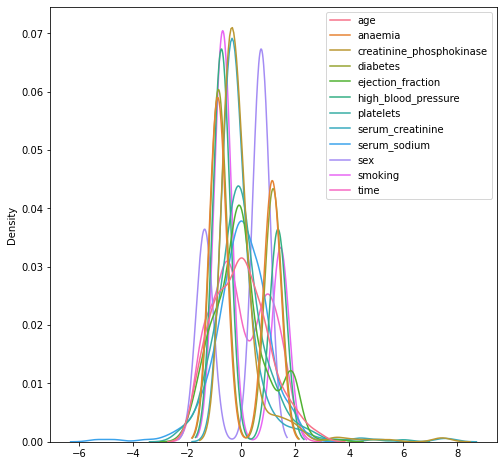

In [18]:
#sns.kdeplot(df['age'], label='age');
X_dist = df.copy()

y_dist = X_dist['DEATH_EVENT'].copy()
X_dist = X_dist.drop(['DEATH_EVENT'], axis=1)

scaler = StandardScaler()

X_dist_scale = scaler.fit_transform(X_dist)
scale_df = pd.DataFrame(X_dist_scale, columns = X_dist.columns)
plt.figure(figsize=(8, 8))
sns.kdeplot(data=scale_df);

In [19]:
#Training and Test Datasets
X = df.copy()
y = X['DEATH_EVENT'].copy()
X = X.drop(['DEATH_EVENT'], axis=1)

X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.2,stratify=y,random_state=17) #stratify=y,

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("y_train Counter class:", Counter(y_train))
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

sm = SMOTE(random_state=17,  k_neighbors=5)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)
print('')
print('X_train SMOTE: ', X_train_sm.shape)
print('y_train SMOTE: ', y_train_sm.shape)
print("y_train Counter class:", Counter(y_train_sm))
print('X_test:', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (239, 12)
y_train:  (239,)
y_train Counter class: Counter({0: 162, 1: 77})
X_test:  (60, 12)
y_test:  (60,)

X_train SMOTE:  (324, 12)
y_train SMOTE:  (324,)
y_train Counter class: Counter({1: 162, 0: 162})
X_test: (60, 12)
y_test:  (60,)


# 4. Hear Failure Death Event Prediction

Machine learning algorithms were trained and measured using performance metrics to compare which algorithm is better for an providing an accurate prediction of a death event based on the features mentioned above.

The Algoritms used:
* K-Nearest Neighbors
* SVM Linear 
* SVM RBF Kernel
* Decision Tree
* Random Forest 
* Logistic Regression

## 4.1 Scores

The scores use common nomenclature. It is important to understand the meaning of each parameter to have a better understanding of how the scores measure the performance.
* TP: True Positive 
* TN: True Negatives 
* FP: False Positives
* FN: False Negative 

The True parameters stand for a correct prediction of the algorithm, and the False an incorrect prediction. In other words, if the algorithm predicts correctly, the TP increases if the prediction is a Death Event or TN if it is a survive even. The opposite with the FP and FN.

### Scores:  
**Confusion matrix**: a visual representation of the results divided into TN = $C_{0,0}$, FN = $C_{1,0}$ ,TP = $C_{1,1}$, FP = $C_{0,1}$.

**Area Under ROC Curve (AUC)**: varies between 0 and 1. When it is 0 the model predicts the wrong class at 100%. Otherwise, if it is 1 the model correctly predicts the class at 100%.

**Precision(Specificity):** It is intuitively the ability of the classifier not to label as positive a sample that is negative. The best value is 1, and the worst value is 0.  
$$Precision = \frac{TP}{TP+FP}$$
 
**Recall(Sensitivity):** It is intuitively the ability of the classifier to find all the positive samples. The best value is 1, and the worst value is 0.  

$$ Recall = \frac{TP}{TP+FN}$$

**Accuracy:** It is how good our model is at predicting the correct category. 

$$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$$

**F1 Score**: The F1 score can be interpreted as a weighted average of precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.  
$$F1 = 2x\frac{Precision\times Recall}{Precision+Recall}$$

## 4.2 K-fold Cross-Validation and Hyper Parameter Optimization

The risk of splitting the data into these two sets (test and training) once is to take sets (at random) that are not representative of the entire data set, leading to finding false precision values.
In order not to run into this problem of **overfitting**, i.e. not generalizing the model, a possible solution is to use **cross-validation**. 

In **K-fold CV**, the training set is split into **k** smaller sets.  
The following is the procedure for each of the k “folds”:
* A model is trained using *k-1* of the folds as training data;
* The resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).

The *sklearn library* contains a function called **GridSearchCV**. GridSearchCV allows to finely tuned the hyper-parameters of each classifier by using the K-Fold according to a score, in this case, the F1 score is used. In other words, the parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.  

In [20]:
best_models = {}
best_models_sm = {}

def get_best_model (method, parameters, cv, X_train, y_train, X_test, y_test):
    results = {}

    gridsearch = GridSearchCV(method, param_grid = parameters, scoring = 'f1', cv = cv, n_jobs=-1)
    gridsearch.fit(X_train, y_train)

    clf = gridsearch.best_estimator_
    clf.fit(X_train, y_train)
      
    y_predict = clf.predict(X_test)

    f1_score_val = round(f1_score(y_test, y_predict, average='binary'), 4)
    precision = round(precision_score(y_test, y_predict, average='binary'), 4)
    recall = round(recall_score(y_test, y_predict, average='binary'),4)
    acc = round(accuracy_score(y_test, y_predict), 4)
    
    print('Best score on validation set: ', round(gridsearch.best_score_, 4))
    print('Classification report on test set:')
    print(classification_report(y_test, y_predict))
    print('F1-score on test set: ', f1_score_val)
    print('Best parameters: ', gridsearch.best_params_)
    
    plot_confusion_matrix(clf, X_test, y_test) #normalize='true')
    plt.show()

    results['accuracy'] = acc
    results['f1_score'] = f1_score_val
    results['precision'] = precision
    results['recall'] = recall
    
    return [clf, results]
                              
    

## 4.3 K-Nearest Neighbors

KNN is a simple algorithm that uses proximity between samples for classification; it assumes that similar things exist in close proximity. In other words, similar things are near to each other. 

The principle behind the nearest neighbor method is to find a predefined number of training samples closest in distance to the new point and predict the label from these. The main parameter is the value of *K* which defines the number of *neighbors* with the same label to the unknown point.

The hyperparameters to be tuned are:
* **N-Neighbors**:  Choosing from a range of 3 to 23 using only odd numbers, having even numbers may confuse the algorithm choice.  
* **Metrics** are the way the distances are calculated. The distances used are Euclidean, Manhattan, and Minkowski.
* **Weights** which consist of uniform weights( All points in each neighborhood are weighted equally) and ‘distance’ (weight points by the inverse of their distance. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away).

Best score on validation set:  0.4338
Classification report on test set:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        41
           1       0.69      0.58      0.63        19

    accuracy                           0.78        60
   macro avg       0.75      0.73      0.74        60
weighted avg       0.78      0.78      0.78        60

F1-score on test set:  0.6286
Best parameters:  {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}


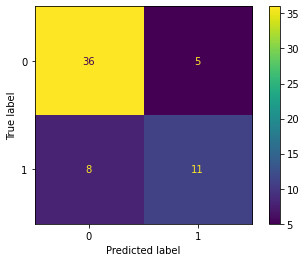

Best score on validation set:  0.8515
Classification report on test set:
              precision    recall  f1-score   support

           0       0.86      0.76      0.81        41
           1       0.58      0.74      0.65        19

    accuracy                           0.75        60
   macro avg       0.72      0.75      0.73        60
weighted avg       0.77      0.75      0.76        60

F1-score on test set:  0.6512
Best parameters:  {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}


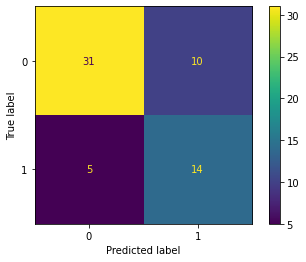

In [21]:
knn = KNeighborsClassifier()

parameters = {
    'n_neighbors': np.arange(3,24,2).tolist(),
    'metric': ['euclidean', 'manhattan','minkowski'],
    'weights': ['uniform', 'distance']
}

best_models['KNN']= get_best_model(knn, parameters,10, X_train, y_train, X_test, y_test)
best_models_sm['KNN']= get_best_model(knn, parameters,10, X_train_sm, y_train_sm, X_test, y_test)

## 4.4 SVM

The Support Vector Machine (SVM) is a supervised machine learning algorithm used for binary classification. The goal is to find a hyperplane that divides the two classes in the best possible way. The two classes are separated by a hyperplane, with a generic equation: 

$$f(X)=\beta0+\beta1+\beta2+⋯+\beta𝑝$$ 

In this sense, there are two possible cases: 
* $f(X) < 0$ for points belonging to the first class 
* $f(X) > 0$ for points belonging to the second class.

The power of the SVM resides on the kernel trick which allows using this method with non-linear data separation by placing a two-dimensional plane into a higher-dimensional space so that it is curved in the higher dimensional space.

The kernel choosen for this method is the Radial Basis Function (RBF):

$$K(X_1, X_2) = e^{-\gamma(||X_1 - X_2||^2)}$$

The hyperparameter to be tuned are:
* C: Trades off correct classification of training examples against maximization of the decision function's margin.
* $\gamma$: Defines how far the influence of a single training example reaches, with low values meaning 'far' and high values meaning 'close'.



### 4.4.1 Linear

Best score on validation set:  0.6736
Classification report on test set:
              precision    recall  f1-score   support

           0       0.95      0.85      0.90        41
           1       0.74      0.89      0.81        19

    accuracy                           0.87        60
   macro avg       0.84      0.87      0.85        60
weighted avg       0.88      0.87      0.87        60

F1-score on test set:  0.8095
Best parameters:  {'C': 1}


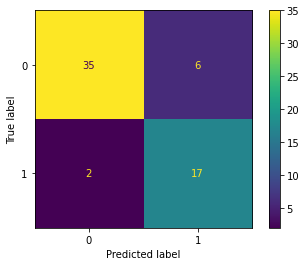

Best score on validation set:  0.8182
Classification report on test set:
              precision    recall  f1-score   support

           0       0.94      0.73      0.82        41
           1       0.61      0.89      0.72        19

    accuracy                           0.78        60
   macro avg       0.77      0.81      0.77        60
weighted avg       0.83      0.78      0.79        60

F1-score on test set:  0.7234
Best parameters:  {'C': 0.01}


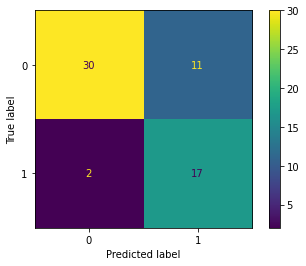

In [22]:
svm_linear = LinearSVC(dual=False)
parameters ={
    'C': [0.01, 1, 10, 100, 1e3],
}

best_models['LinearSVM']= get_best_model(svm_linear, parameters,10, X_train, y_train, X_test, y_test)
best_models_sm['LinearSVM']= get_best_model(svm_linear, parameters,10, X_train_sm, y_train_sm, X_test, y_test)

### 4.4.2 RBF Kernel

Best score on validation set:  0.6621
Classification report on test set:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        41
           1       0.81      0.89      0.85        19

    accuracy                           0.90        60
   macro avg       0.88      0.90      0.89        60
weighted avg       0.90      0.90      0.90        60

F1-score on test set:  0.85
Best parameters:  {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


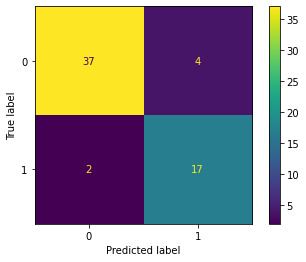

Best score on validation set:  0.8481
Classification report on test set:
              precision    recall  f1-score   support

           0       0.94      0.80      0.87        41
           1       0.68      0.89      0.77        19

    accuracy                           0.83        60
   macro avg       0.81      0.85      0.82        60
weighted avg       0.86      0.83      0.84        60

F1-score on test set:  0.7727
Best parameters:  {'C': 1000.0, 'gamma': 0.001, 'kernel': 'rbf'}


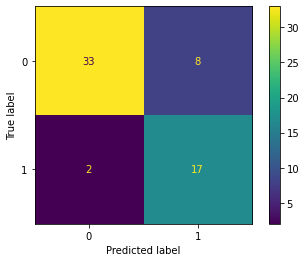

In [23]:
svc_rbf = SVC(probability=True)
parameters = {
    'kernel': ['rbf'],
    'C': [1e-3, 0.01, 1, 10, 100, 1e3],
    'gamma': [1e-3, 0.01, 1e-6, 1e-9],
}

best_models['SVM_RBF']= get_best_model(svc_rbf, parameters,10, X_train, y_train, X_test, y_test)
best_models_sm['SVM_RBF']= get_best_model(svc_rbf, parameters,10, X_train_sm, y_train_sm, X_test, y_test)

## 4.6 Decision Tree

Decision Tree is a Supervised learning technique most preferred for solving **Classification** problems. The goal is to create a model predicting the value of a target variable by learning simple decision rules inferred from the data features.

Decision Tree consists of:
* Nodes: Test for the value of a certain attribute.
* Edges/Branch: Correspond to the outcome of a test and connect to the next node or leaf.
* Leaf nodes: Terminal nodes that predict the outcome (represent class labels or class distribution).

The hyperparameters to be tuned are:
* Criterion: The function to measure the quality of a split.
 * Gini: It is the name of the cost function that is used to evaluate the binary splits in the dataset and works with the categorical target variable “Success” or “Failure”. Higher the value of the Gini index, the higher the homogeneity. A perfect Gini index value is 0 and the worst is 0.5 (for 2 class problem).  
 * Entropy: This is the measure of disorder, the idea is to minimize it to maximize the purity of the groups.
* Splitter: How to split at each node. “Best” to choose the best split and “random” to choose the best random split.
* Max Depth: The maximum depth of the tree.
* Min Samples Split: The minimum number of samples required to split an internal node.

Best score on validation set:  0.7174
Classification report on test set:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        41
           1       0.71      0.79      0.75        19

    accuracy                           0.83        60
   macro avg       0.81      0.82      0.81        60
weighted avg       0.84      0.83      0.84        60

F1-score on test set:  0.75
Best parameters:  {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 12, 'splitter': 'random'}


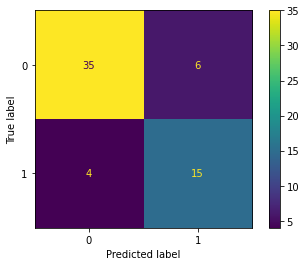

Best score on validation set:  0.8591
Classification report on test set:
              precision    recall  f1-score   support

           0       0.90      0.63      0.74        41
           1       0.52      0.84      0.64        19

    accuracy                           0.70        60
   macro avg       0.71      0.74      0.69        60
weighted avg       0.78      0.70      0.71        60

F1-score on test set:  0.64
Best parameters:  {'criterion': 'gini', 'max_depth': 23, 'min_samples_split': 6, 'splitter': 'random'}


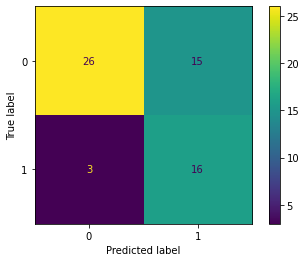

In [39]:
decisionTree = DecisionTreeClassifier()
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': np.arange(1,30,2).tolist(),
    'min_samples_split': [2,3,5,6,10,12],
}

best_models['DecisionTree']= get_best_model(decisionTree, parameters,10, X_train, y_train, X_test, y_test)
best_models_sm['DecisionTree']= get_best_model(decisionTree, parameters,10, X_train_sm, y_train_sm, X_test, y_test)

### Best Decision tree plot for no SMOTE data

In [38]:
from subprocess import call
# Display in jupyter notebook
from IPython.display import Image

clf = best_models['DecisionTree'][0]
clf = clf.fit(X, y)

#fig, axes = plt.subplots(figsize = (5,3), dpi=600)

#tree.plot_tree(clf, 
#               feature_names = X.columns, 
#               class_names=['Survive','Dead'],
#               filled = True);

graph = Source(tree.export_graphviz(clf, out_file='tree.dot', 
        feature_names=X.columns, 
        class_names=['Survive', 'Dead'],
        rounded = False, proportion = False, 
        precision = 2,filled = True))

# Convert to png using system command (requires Graphviz)
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
Image(filename = 'tree.png')

## 4.7 Random Forest

A Random Forest Classifier is an ensemble learning method that operates by constructing a multitude of decision trees at training time and outputting the class. The decisions are averaged to generalize better the model and therefore prevent overfitting one of the downsides of the decision trees.

The hyperparameters to be tuned are the same as in the decision tree (max_depth and criterion), the only difference is **n_estimators** that are the number of trees in the forest. If max_depth is None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples(default =2)


Best score on validation set:  0.7428
Classification report on test set:
              precision    recall  f1-score   support

           0       0.95      0.85      0.90        41
           1       0.74      0.89      0.81        19

    accuracy                           0.87        60
   macro avg       0.84      0.87      0.85        60
weighted avg       0.88      0.87      0.87        60

F1-score on test set:  0.8095
Best parameters:  {'criterion': 'entropy', 'n_estimators': 700}


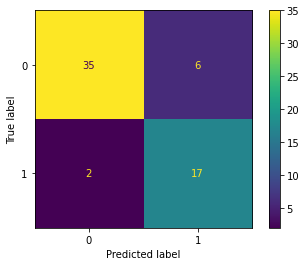

Best score on validation set:  0.893
Classification report on test set:
              precision    recall  f1-score   support

           0       0.97      0.83      0.89        41
           1       0.72      0.95      0.82        19

    accuracy                           0.87        60
   macro avg       0.85      0.89      0.86        60
weighted avg       0.89      0.87      0.87        60

F1-score on test set:  0.8182
Best parameters:  {'criterion': 'entropy', 'n_estimators': 700}


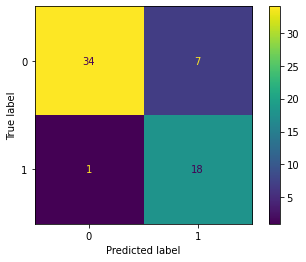

In [47]:
random_forest = RandomForestClassifier(bootstrap=True)
parameters = {
    #'max_depth': np.arange(5,25,2).tolist(),
    'criterion': ['entropy', 'gini'],
    'n_estimators': [100,500,700],
}

best_models['RandomForest']= get_best_model(random_forest, parameters,10, X_train, y_train, X_test, y_test)
best_models_sm['RandomForest']= get_best_model(random_forest, parameters,10, X_train_sm, y_train_sm, X_test, y_test)

## 4.8 Logistic Regression

Logistic regression is a classification algorithm. It is used to predict a binary outcome based on a set of independent variables. In other words it is based on the idea to assign a label by the calculated probability of that sample to be assigned at one label.

$$ p(X) = P(Y=1|X)$$

Logistic Regression assumptions:
* The dependent variable is binary.
* The predictor variables should be independent of each other.
* Logistic regression requires fairly large sample sizes.

The hyperparameters to be tune are:
* C: Represents the inverse of regularization, smaller values specify stronger regularization.
* Penalty: Used to specify the norm used in the penalization. 
 * l1: Manhattan distance
 * l2: Euclidian Norm

Best score on validation set:  0.666
Classification report on test set:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91        41
           1       0.77      0.89      0.83        19

    accuracy                           0.88        60
   macro avg       0.86      0.89      0.87        60
weighted avg       0.89      0.88      0.89        60

F1-score on test set:  0.8293
Best parameters:  {'C': 1, 'penalty': 'l2'}


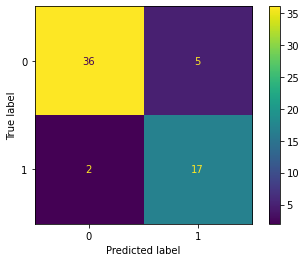

Best score on validation set:  0.8159
Classification report on test set:
              precision    recall  f1-score   support

           0       0.94      0.78      0.85        41
           1       0.65      0.89      0.76        19

    accuracy                           0.82        60
   macro avg       0.80      0.84      0.80        60
weighted avg       0.85      0.82      0.82        60

F1-score on test set:  0.7556
Best parameters:  {'C': 1, 'penalty': 'l2'}


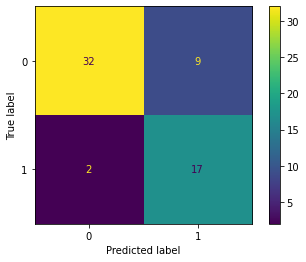

In [48]:
logistic_regression = LogisticRegression()
parameters = {
     'C': [1e-3, 0.01, 1, 10, 100, 1e3],
     'penalty': ['l1', 'l2']
}

best_models['LogisticReg']= get_best_model(logistic_regression, parameters,10, X_train, y_train, X_test, y_test)
best_models_sm['LogisticReg']= get_best_model(logistic_regression, parameters,10, X_train_sm, y_train_sm, X_test, y_test)

# 5. Analysis 

## 5.1 ROC Curve

The ROC curve is a graph that shows the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

The graph is plotted through 2 variable:
* True positive rate: calculate as the recall metric, and it's defined as:

$$ TPR = \frac{True\ Positive}{True\ Positive + False\ Negative}$$
* False positive rate: defined as:

$$ FPR = \frac{False\ Positive}{False\ Positive + True\ Negative}$$

As a metric for the comparison, it's used the *AUC (Area Under the ROC Curve)*. It's a measure that aggregates "measure of performance" across all possible classification thresholds, so it tells how much a model is capable of distinguishing between classes.  
The AUC is higher when the model classifies 0s as 0as and 1s and 1s. 


In [49]:
best_models_copy = best_models.copy()
del best_models_copy['LinearSVM']

def plot_roc_curve(methods, name_methods, X_test, y_test, title_to_add=None):
    fpr = dict()
    tpr =dict()
    roc_auc = dict()
    fig = go.Figure()
    y_test_roc = np.array([([0, 1] if y else [1, 0]) for y in y_test])
    for method, name in zip(methods, name_methods):
        y_score = method.predict_proba(X_test)
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test_roc.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
        
        fig.add_trace(
            go.Scatter(x=fpr['micro'], y=tpr['micro'], 
                       mode='lines', name=name + " (auc = %0.2f) "% roc_auc["micro"] )
        )
        
        fig.add_trace(
        go.Scatter(x=[0,1], y=[0,1], line=dict(
                              dash='dash'), showlegend=False)
    )
    if title_to_add is None:
        fig.update_layout(title='ROC curve', xaxis_title='FPR', yaxis_title='TPR')
    else:
        fig.update_layout(title='ROC curve,' + title_to_add, xaxis_title='FPR', yaxis_title='TPR')
    fig.show()
    
models = np.array(list(best_models_copy.values()))[:, 0] # take the classifier models
plot_roc_curve(models, best_models_copy.keys(), X_test, y_test)

## 5.2 Numerical Scores of the Classifiers

In [55]:
tmp ={}
overall = pd.DataFrame(columns=['accuracy','f1_score','precision','recall'])
overall_sm = pd.DataFrame(columns=['accuracy','f1_score','precision','recall'])

for key, values in best_models.items():
    new_row = values[1]
    overall.loc[key] = new_row

for key, values in best_models_sm.items():
    new_row = values[1]
    overall_sm.loc[key] = new_row
    
print("Without SMOTE\n")
print(overall.head(10))
print('')
print('With SMOTE\n')
print(overall_sm.head(10))


Without SMOTE

              accuracy  f1_score  precision  recall
KNN             0.7833    0.6286     0.6875  0.5789
LinearSVM       0.8667    0.8095     0.7391  0.8947
SVM_RBF         0.9000    0.8500     0.8095  0.8947
DecisionTree    0.8333    0.7500     0.7143  0.7895
RandomForest    0.8667    0.8095     0.7391  0.8947
LogisticReg     0.8833    0.8293     0.7727  0.8947

With SMOTE

              accuracy  f1_score  precision  recall
KNN             0.7500    0.6512     0.5833  0.7368
LinearSVM       0.7833    0.7234     0.6071  0.8947
SVM_RBF         0.8333    0.7727     0.6800  0.8947
DecisionTree    0.7000    0.6400     0.5161  0.8421
RandomForest    0.8667    0.8182     0.7200  0.9474
LogisticReg     0.8167    0.7556     0.6538  0.8947


# 6. Conclusions

This study contains six different classification methods ran for the dataset about Health_Failure with 299 entries and 12 features were taken into consideration for finding the best prediction about a death event. In general, the correlation between the features and the dependent variable were few. Serum creatinine and age variables had a low positive correlation with the **DEATH_EVENT**, and ejection fraction and serum sodium a low negative correlation.  
Another characteristic of this dataset is that it is not balanced. Therefore, the SMOTE technique was used to address this issue.  
In section 5.2, the results of the classification methods with and without oversampling are presented. Surprisingly the results using the oversampling were not better than the ones with the original dataset, as expected. This could be because there are many not continuous variables in the data. Thus, I will focus on the results of the classification methods without SMOTE.  
The best results were obtained by the SVM with RBF kernel, showing a 90% of accuracy and 85% of F1 score. The second-best accuracy, 88%, was obtained using Logistic Regression. This makes sense because this method works better with uncorrelated variables, as stated in its assumptions. On the other hand, the Random Forest method outperformed the Decision Tree, as expected, because the former is constructed by the average decision of several trees.  
Finally, the outcomes presented in the ROC curve chart reaffirm what is shown in the table, the poor performance of KNN. Besides, the curve evidenced that despite the Logistic Regression and the Random Forest have the same AUC, Logistic Regression converges faster.

In [53]:
for key in best_models.keys():
    row = best_models[key][1]
    row_sm = best_models_sm[key][1]
    tmp[key] = [row['accuracy'],row['f1_score'],row['precision'],row['recall'],
               row_sm['accuracy'],row_sm['f1_score'],row_sm['precision'],row_sm['recall']]

#header_name = [['Normal','Normal','Normal','Normal', 'SMOTE','SMOTE','SMOTE','SMOTE'],['accuracy','f1_score','precision','recall','accuracy','f1_score','precision','recall']]

#headers = pd.MultiIndex.from_arrays(header_name)

#overall= pd.DataFrame(data=tmp.values(), index=best_models.keys(), columns=headers)
#print(overall.head(10))
